## Import Warnings and Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading and understanding the data

In [3]:
retail_data = pd.read_csv('Global+Superstore+Data.csv')
retail_data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
retail_data.shape

(51290, 5)

In [5]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
retail_data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [7]:
retail_data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [8]:
retail_data.nunique().sort_values()

Segment           3
Market            7
Order Date     1430
Sales         22995
Profit        24575
dtype: int64

## Ploting Time series data

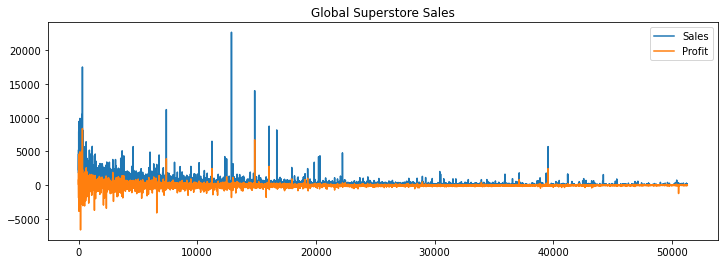

In [9]:
retail_data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Global Superstore Sales')
plt.show(block=False)

In [10]:
retail_data['Market_Segment'] = retail_data[['Market','Segment']].agg('-'.join, axis=1)

In [11]:
retail_data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US-Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa-Consumer


APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


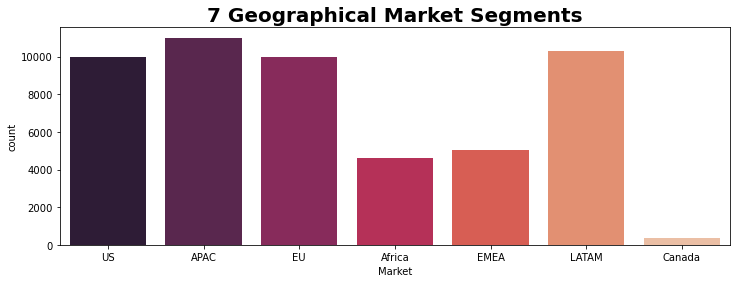

In [12]:
plt.figure(figsize=(12,4))
print(retail_data.Market.value_counts())
sns.countplot(retail_data['Market'], palette='rocket')
plt.title('7 Geographical Market Segments', fontweight='bold', size=20)
plt.show()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


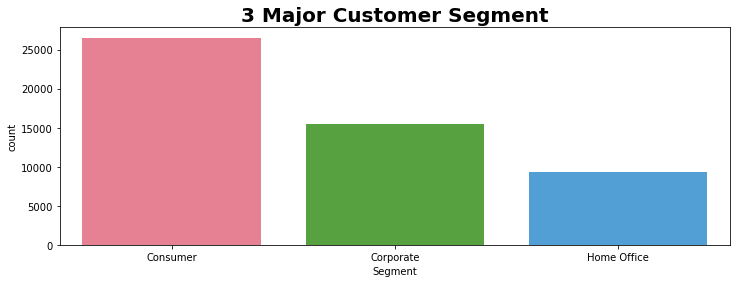

In [13]:
plt.figure(figsize=(12,4))
print(retail_data.Segment.value_counts())
sns.countplot(retail_data['Segment'], palette='husl')
plt.title('3 Major Customer Segment', fontweight='bold', size=20)
plt.show()

APAC-Consumer         5699
LATAM-Consumer        5321
US-Consumer           5191
EU-Consumer           5186
APAC-Corporate        3283
EU-Corporate          3077
LATAM-Corporate       3053
US-Corporate          3020
EMEA-Consumer         2538
Africa-Consumer       2381
APAC-Home Office      2020
LATAM-Home Office     1920
US-Home Office        1783
EU-Home Office        1737
EMEA-Corporate        1574
Africa-Corporate      1312
EMEA-Home Office       917
Africa-Home Office     894
Canada-Consumer        202
Canada-Corporate       110
Canada-Home Office      72
Name: Market_Segment, dtype: int64


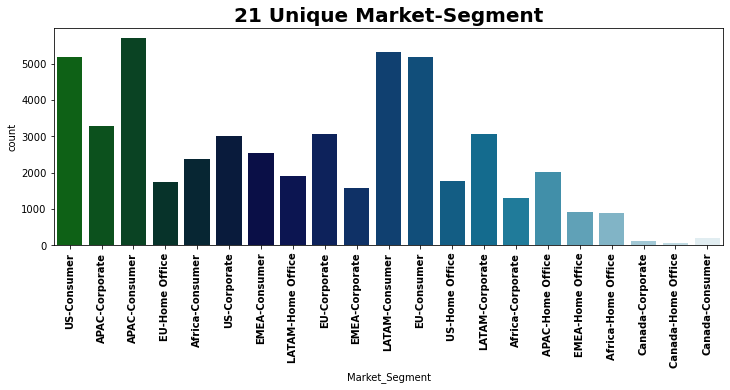

In [14]:
plt.figure(figsize=(12,4))
print(retail_data.Market_Segment.value_counts())
sns.countplot(retail_data['Market_Segment'], palette='ocean')
plt.title('21 Unique Market-Segment', fontweight='bold', size=20)
plt.xticks(rotation = 90, fontweight="bold")
plt.show()

- we can see that APAC_Consumer has the highest count

## Market-segment vs Profit

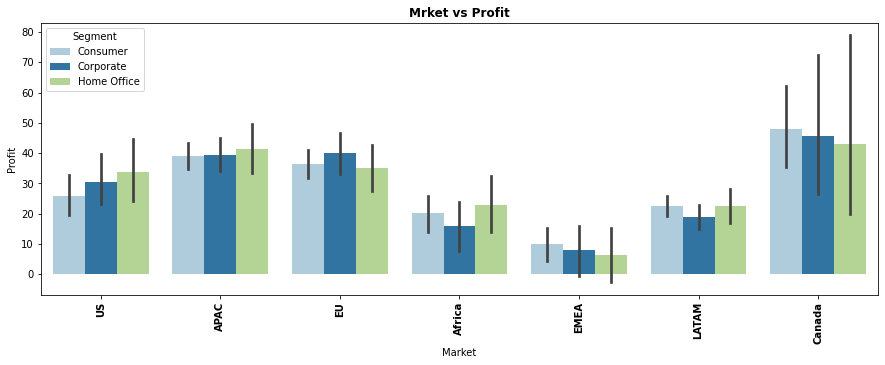

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market', y='Profit', hue='Segment', data=retail_data, palette='Paired')
plt.title('Mrket vs Profit', fontweight='bold')
plt.xticks(rotation=90, fontweight="bold")
plt.show()

## Market-Segment vs Sales

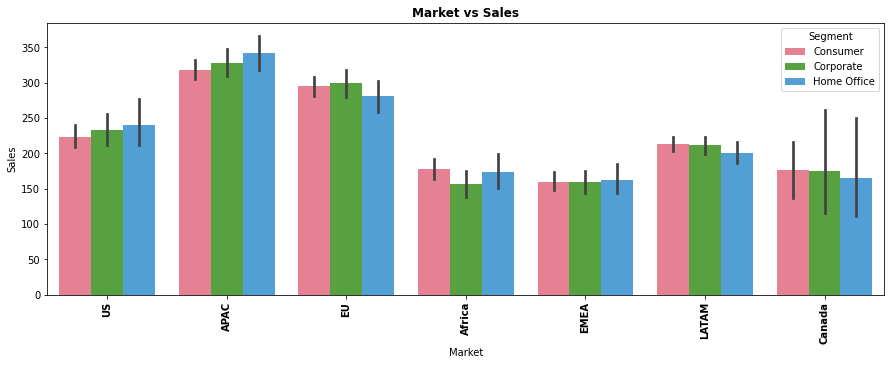

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market', y='Sales', hue='Segment', data=retail_data, palette='husl')
plt.title('Market vs Sales', fontweight='bold')
plt.xticks(rotation=90, fontweight="bold")
plt.show()

## Drop 'Market' and 'Segment' columns

In [17]:
retail_data = retail_data.drop(['Market','Segment'], axis=1)
retail_data.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US-Consumer
1,05-02-2013,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,5175.171,919.9710,APAC-Consumer
3,28-01-2013,2892.510,-96.5400,EU-Home Office
4,05-11-2013,2832.960,311.5200,Africa-Consumer


## Convert 'Order Date'  into a date-time format

In [18]:
retail_data['Order Date'] = pd.to_datetime(retail_data['Order Date']).dt.to_period('m')
retail_data = retail_data.sort_values(by=['Order Date'])
retail_data.head()                                                                                    

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU-Corporate
26744,2011-01,88.44,15.84,EU-Consumer
48614,2011-01,11.43,4.11,EU-Corporate
9417,2011-01,491.00,122.70,LATAM-Consumer
48590,2011-01,4.71,0.00,US-Home Office


In [19]:
retail_data_profit = retail_data.pivot_table(index='Order Date', values='Profit', columns='Market_Segment', aggfunc='sum')
retail_data_profit.head()

Market_Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [20]:
retail_data_profit.shape

(48, 21)

## Train-Test Split

In [21]:
train_len = 42
train = retail_data_profit[0:train_len]
test = retail_data_profit[train_len:]

In [22]:
train.shape

(42, 21)

In [23]:
train.head()

Market_Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


### Now Calculating the CoV on the profit for each of the 21 market segments on the train data.

In [24]:
mean = np.mean(train)
std = np.std(train)
Co_V = pd.DataFram(mean)
Co_V['std'] = std
Co_V['CoV'] = std/mean
Co_V = Co_V.reset_index()
Co_V.columns = ['Market_Segment','Mean','Std','CoV']
Co_V.sort_values(by='CoV', ascending=True, inplace=True)
Co_V

,Market_Segment,Mean,Std,CoV
0,APAC-Consumer,4400.894243,2300.457687,0.522725
1,APAC-Corporate,2574.919807,1364.837734,0.530051
12,EU-Consumer,3699.977143,2202.282289,0.595215
15,LATAM-Consumer,2295.555697,1569.632686,0.683770
13,EU-Corporate,2216.299429,1600.336696,0.722076
16,LATAM-Corporate,1122.633016,990.360880,0.882177
14,EU-Home Office,1224.456536,1148.627937,0.938072
2,APAC-Home Office,1511.088314,1523.508658,1.008219
18,US-Consumer,2686.740912,2715.031412,1.010530
19,US-Corporate,1754.199083,1880.200775,1.071829


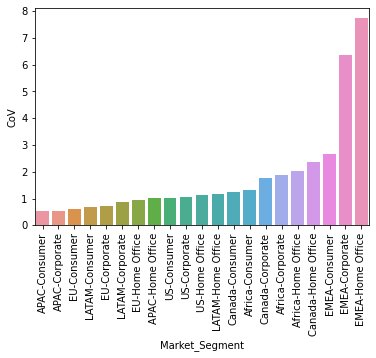

In [25]:
sns.barplot(x='Market_Segment', y='CoV', data=Co_V)
plt.xticks(rotation=90)
plt.show()

- From the above graph we can see that lowest Covariance value is 0.522725 of APAC_Consumer.So APAC_Consumer is the Profitable Market Segment.

### Now we will convert Order-Date from Date-Time to Timestamp

In [26]:
retail_data['Order Date']= retail_data['Order Date'].astype(str)
retail_data['Order Date']= pd.to_datetime(retail_data['Order Date'])
retail_data['Order Date'].dtype
retail_data.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01-01,139.65,15.30,EU-Corporate
26744,2011-01-01,88.44,15.84,EU-Consumer
48614,2011-01-01,11.43,4.11,EU-Corporate
9417,2011-01-01,491.00,122.70,LATAM-Consumer
48590,2011-01-01,4.71,0.00,US-Home Office


In [31]:
# So now we have the Most profitable Market Segment so now we will drop the rest 20 market segment.
retail_data_main = retail_data[(retail_data.Market_Segment=='APAC-Consumer')]
retail_data_main.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC-Consumer
9203,2011-01-01,219.780,59.340,APAC-Consumer
19331,2011-01-01,342.510,54.600,APAC-Consumer
26270,2011-01-01,102.762,1.842,APAC-Consumer
14830,2011-01-01,420.420,147.000,APAC-Consumer


In [32]:
sales_data= pd.DataFrame(retail_data_main.groupby("Order Date")['Sales'].sum())
sales_data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [33]:
sales_data.shape

(48, 1)

## Time Series Analysis

 ###  Plot time series data

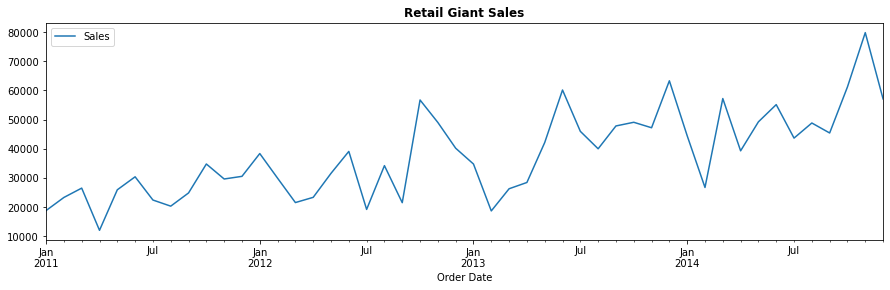

In [34]:
sales_data.plot(figsize=(15,4))
plt.legend(loc='best')
plt.title('Retail Giant Sales',fontweight='bold')
plt.show(block=False)

### Checking Null values

In [35]:
sales_data.isnull().sum()

Sales    0
dtype: int64

### spliting time series data into train and test set

In [36]:
train_len=42
train = sales_data[0:train_len] 
test = sales_data[train_len:]

### Time Series Decompostion

 ### Additive seasonal Decomposition

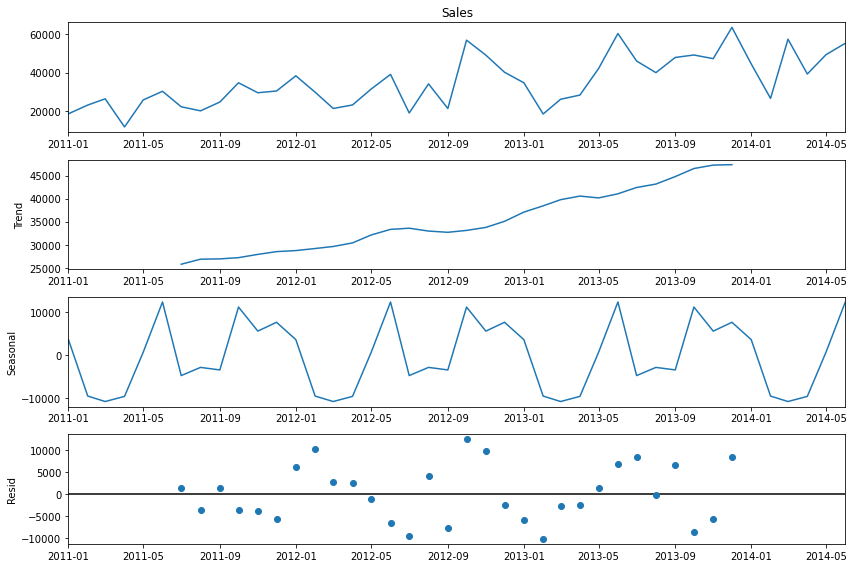

In [37]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=12,8
decompostion = sm.tsa.seasonal_decompose(train.Sales,model='additive')
fig=decompostion.plot()
plt.show()

 ### Multiplicative seasonal decomposition 

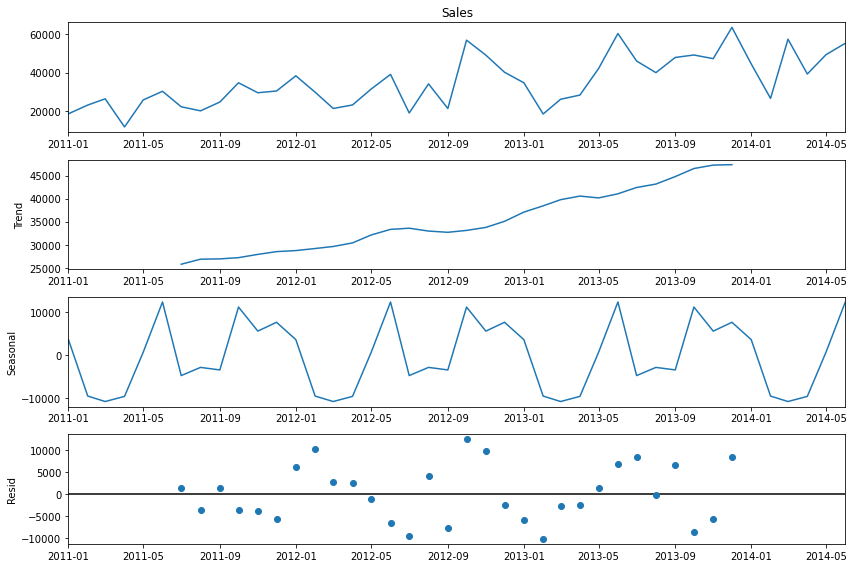

In [38]:
decomposition = sm.tsa.seasonal_decompose(train.Sales,model='multiplicative')
fig=decompostion.plot()
plt.show()

##  For Time Series Forecast

### Splitting time series data into test and train set

In [39]:
train_len = 42
train = sales_data[0:train_len] 
test = sales_data[train_len:]

### Simple Time Series Method

- ### Naive Method

In [41]:
y_hat_naive=test.copy()
y_hat_naive['naive_forecast']=train['Sales'][train_len-1]

### plot train , test and forecast

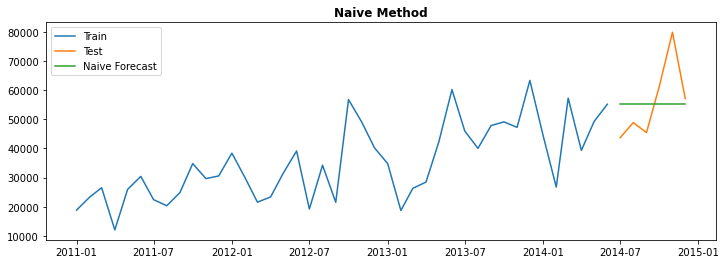

In [42]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_naive['naive_forecast'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

### calculate RMSE and MAPE

In [43]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['Sales'],y_hat_naive['naive_forecast'])).round(2)
mape=np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results= pd.DataFrame({'Method':['Naive Method'],'MAPE':[mape],'RMSE':[rmse]})
results=results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47


- ### Simple Average Method

In [44]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

### plot train , test and forecast

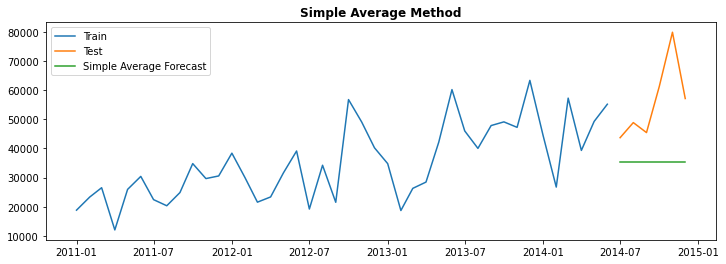

In [45]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_avg['avg_forecast'],label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method', fontweight= 'bold')
plt.show()

### calculate RSME and MAPE

In [46]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34


### Simple Moving Average Method

In [47]:
y_hat_sma = sales_data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = sales_data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### plot train , test and forecast

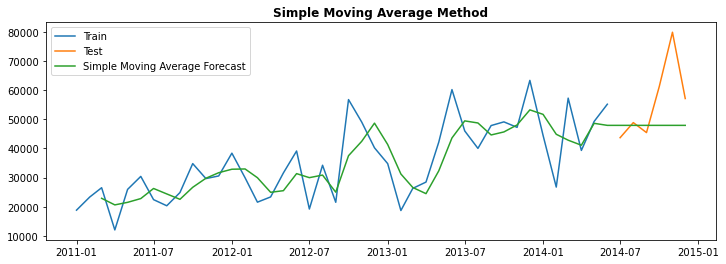

In [48]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

### calculate RMSE and MAPE 

In [49]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82


## Exponential Smoothing Method

### Simple Exponential Smoothing

In [50]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized = True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast']=model_fit.forecast(6)

C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### plot train , test and forecast

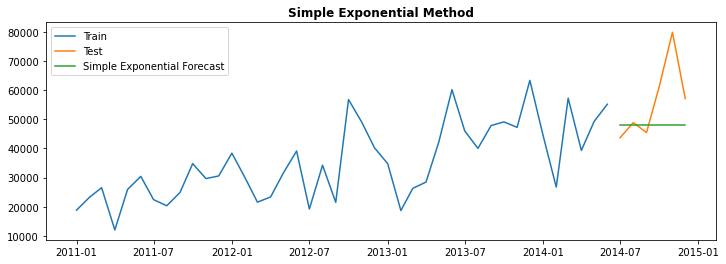

In [51]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_ses['ses_forecast'],label='Simple Exponential Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Method', fontweight= 'bold')
plt.show()

### calculate RMSE and MAPE

In [52]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74


## Holt's Exponential Smoothing

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [54]:
model= ExponentialSmoothing(np.asarray(train['Sales']),seasonal_periods = 12 , trend='additive', seasonal=None)
model_fit= model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt= test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### plot train , test and forecast

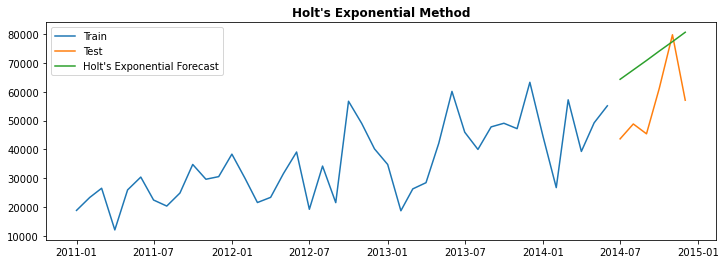

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_holt['holt_forecast'],label='Holt\'s Exponential Forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Method', fontweight= 'bold')
plt.show()

### calculate RMSE and MAPE

In [56]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57


## Holt Winters' additive method with trend and seasonality

In [57]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 ### Plot Test,Train and Forecast

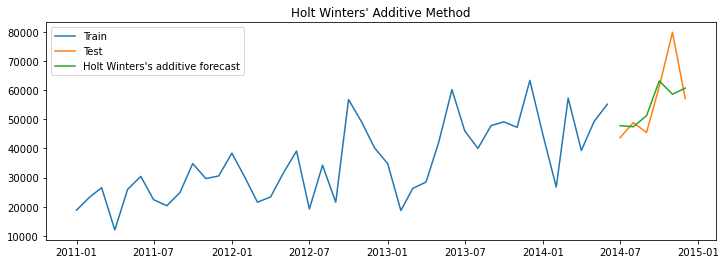

In [58]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### calculate RMSE and MAPE

In [59]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17


# Holt Winter's multiplicative method with trend and seasonality

In [60]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### plot train , test and forecast

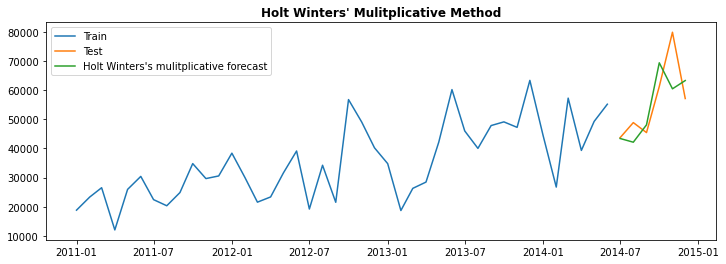

In [61]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

### calculate RMSE and MAPE

In [62]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


- So, Here We can See that Holt Winters' additive method giving batter forecast.

# Auto Regressive Methods

## Stationarity vs non-stationary time series

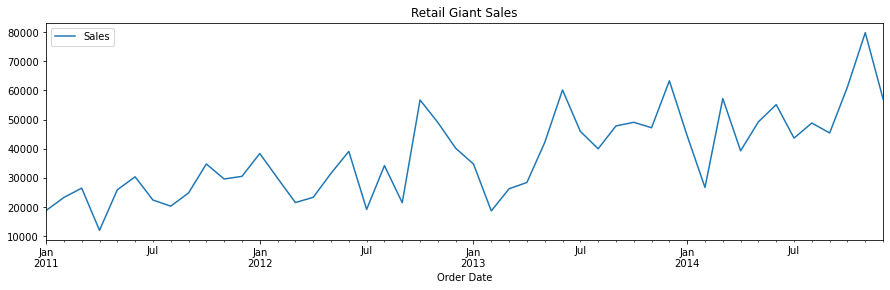

In [63]:
sales_data['Sales'].plot(figsize=(15,4))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [64]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(sales_data['Sales'])

print('ADF Statistics: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('P-value: %f' % adf_test[1])

ADF Statistics: -3.376024
Critical Value @ 0.05: -2.93
P-value: 0.011804


- Here , we have null hypothesis is that the series is not stationary when p-value > 0.05, Above from the result we can see that our series is stationary because p-value = 0.011 < 0.05.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [65]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(sales_data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


- Here , we have null hypothesis is that the series is stationary when p-value > 0.05, Above from the result we can see that our series is not stationary because p-value = 0.024 < 0.05.

## Box Cox transformation to make variance constant
 - For Converting non stationary to stationary series.

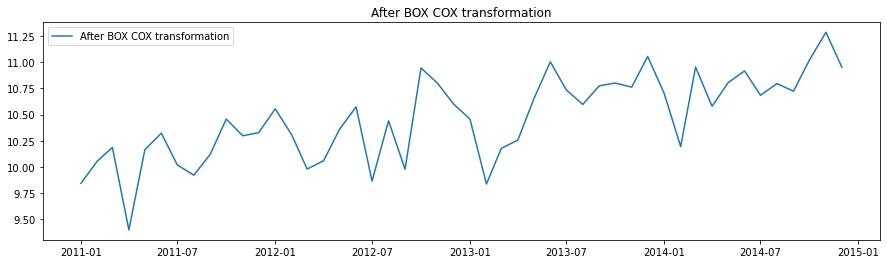

In [66]:
from scipy.stats import boxcox
sales_data_boxcox = pd.Series(boxcox(sales_data['Sales'], lmbda = 0), index = sales_data.index)

plt.figure(figsize=(15,4))
plt.plot(sales_data_boxcox, label= 'After BOX COX transformation')
plt.legend(loc='best')
plt.title('After BOX COX transformation')
plt.show()

### Differencing to remove trend

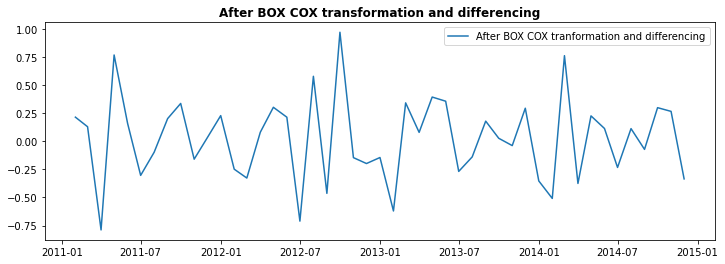

In [67]:
sales_data_boxcox_diff = pd.Series(sales_data_boxcox - sales_data_boxcox.shift(), sales_data.index)
plt.figure(figsize=(12,4))
plt.plot(sales_data_boxcox_diff, label='After BOX COX tranformation and differencing')
plt.legend(loc='best')
plt.title('After BOX COX transformation and differencing', fontweight='bold')
plt.show()

In [68]:
sales_data_boxcox_diff.dropna(inplace=True)

In [69]:
sales_data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [70]:
adf_test = adfuller(sales_data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


- Here , Above from the result we can see that our series is stationary because p-value = 0.00017 < 0.05.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [71]:
kpss_test = kpss(sales_data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


- Here , Above from the result we can see that our series is stationary because p-value = 0.100 > 0.05.

## Autocorrelation function (ACF)

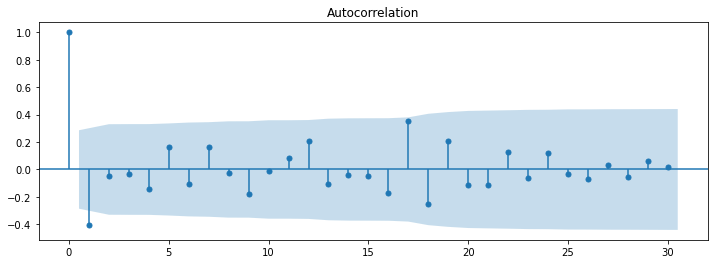

In [72]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(sales_data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

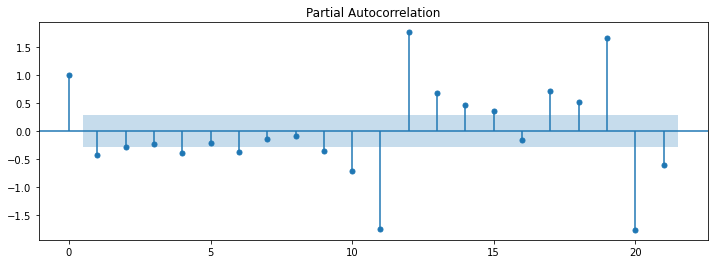

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(sales_data_boxcox_diff, ax=plt.gca(), lags = 21)
plt.show()

In [77]:
train_sales_data_boxcox = sales_data_boxcox[:train_len]
test_sales_data_boxcox = sales_data_boxcox[train_len:]
train_sales_data_boxcox_diff = sales_data_boxcox_diff[:train_len-1]
test_sales_data_boxcox_diff = sales_data_boxcox_diff[train_len-1:]

In [78]:
train_sales_data_boxcox_diff

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
2011-07-01   -0.303937
2011-08-01   -0.098320
2011-09-01    0.201126
2011-10-01    0.335976
2011-11-01   -0.159845
2011-12-01    0.030117
2012-01-01    0.227734
2012-02-01   -0.248683
2012-03-01   -0.327663
2012-04-01    0.079944
2012-05-01    0.301872
2012-06-01    0.213622
2012-07-01   -0.710884
2012-08-01    0.577494
2012-09-01   -0.463894
2012-10-01    0.969434
2012-11-01   -0.146063
2012-12-01   -0.198531
2013-01-01   -0.144942
2013-02-01   -0.620558
2013-03-01    0.341112
2013-04-01    0.078691
2013-05-01    0.392955
2013-06-01    0.355907
2013-07-01   -0.268628
2013-08-01   -0.139388
2013-09-01    0.178702
2013-10-01    0.026014
2013-11-01   -0.038982
2013-12-01    0.293485
2014-01-01   -0.353341
2014-02-01   -0.508883
2014-03-01    0.761118
2014-04-01   -0.375717
2014-05-01    0.225410
2014-06-01    0.113222
dtype: float64

## Auto regression method (AR)

In [79]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_sales_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [80]:
y_hat_ar = sales_data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(sales_data_boxcox_diff.index.min(), sales_data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(sales_data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

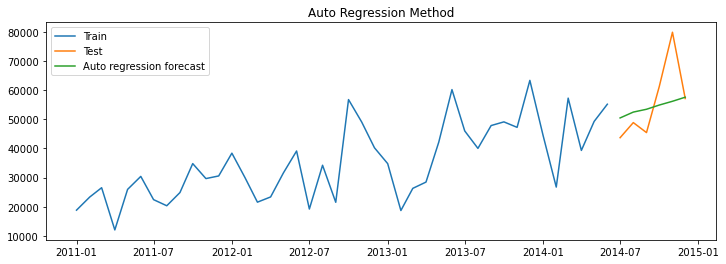

In [81]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [82]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


## Moving average method (MA)

In [83]:
model = ARIMA(train_sales_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [84]:
y_hat_ma = sales_data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(sales_data_boxcox_diff.index.min(), sales_data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(sales_data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

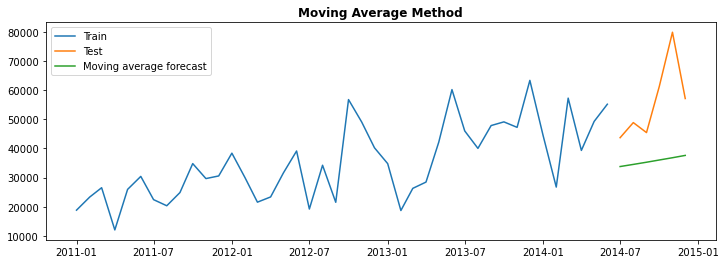

In [85]:
plt.figure(figsize=(12,4))
plt.plot(sales_data['Sales'][:train_len], label='Train')
plt.plot(sales_data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

### Calculate RMSE and MAPE

In [86]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


## Auto regression moving average method (ARMA)

In [87]:
model = ARIMA(train_sales_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


### Recover original time series

In [88]:
y_hat_arma = sales_data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(sales_data_boxcox_diff.index.min(), sales_data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(sales_data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

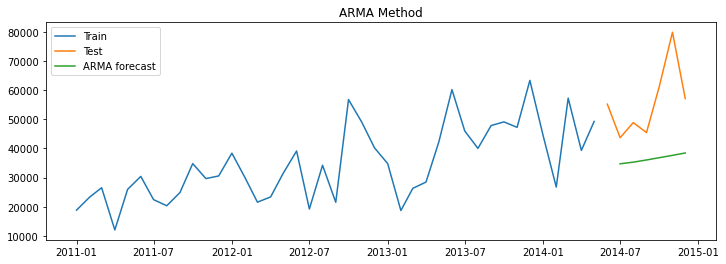

In [89]:
plt.figure(figsize=(12,4))
plt.plot(sales_data['Sales'][:train_len-1], label='Train')
plt.plot(sales_data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [90]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


## Auto regressive integrated moving average (ARIMA)

In [91]:
model = ARIMA(train_sales_data_boxcox, order=(1, 1, 1))# p,d,q
model_fit = model.fit()
print(model_fit.params)

C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover original time series forecast

In [92]:
y_hat_arima = sales_data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(sales_data_boxcox_diff.index.min(), sales_data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(sales_data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

 ### Plot train, test and forecast

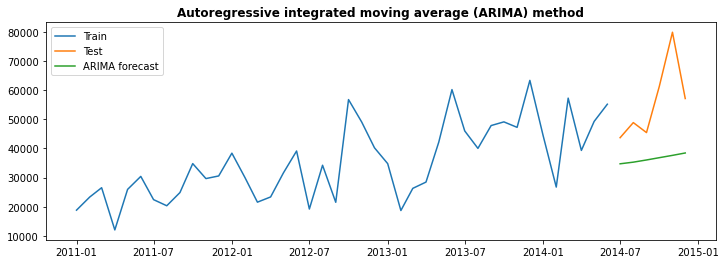

In [93]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

### Calculate RMSE and MAPE

In [94]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


## Seasonal auto regressive integrated moving average (SARIMA)

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_sales_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\abcd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.041766
ma.L1      -0.997531
ar.S.L12    0.100223
ma.S.L12   -0.976786
sigma2      0.057947
dtype: float64


 ### Recover original time series forecast

In [96]:
y_hat_sarima = sales_data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(sales_data_boxcox_diff.index.min(), sales_data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

 ### Plot train, test and forecast

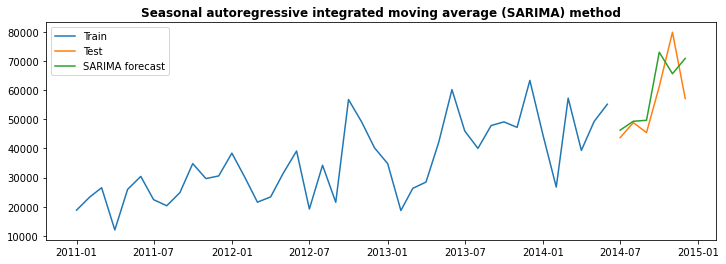

In [97]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

### Calculate RMSE and MAPE

In [98]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


- SARIMA method able to predict the sales closer to the Actual value. SARIMA method has a least value among all other method. 

# Conclusion

- In the Smoothing Technique , Holt Winters' additive method predict the sales closer to the actual values and its RMSE and MAPE value is least compare to other smoothing technique method.

- In Autoregressive method, SARIMA method predict the sales closer to the actual values and its RMSE and MAPE value is least compare to other AR method.